In [21]:
import graphinf, midynet
import numpy as np, matplotlib.pyplot as plt, seaborn as sns, pandas as pd


In [88]:
N, M = 3, 3
erdos = graphinf.random_graph.ErdosRenyiModel(N, M, with_self_loops=True, with_parallel_edges=True)
config = graphinf.random_graph.ConfigurationModelFamily(N, M, degree_prior_type="uniform")
sbm = graphinf.random_graph.StochasticBlockModelFamily(
    N, M, 
    block_prior_type="hyper", 
    with_self_loops=True, 
    with_parallel_edges=True
)

logp = dict(erdos=[], config=[])

for i, g in enumerate(midynet.utility.enumerate_all_graphs(N, M, True, True)):
    erdos.set_state(g)
    config.set_state(g)
    logp["erdos"].append(erdos.get_log_joint())
    logp["config"].append(config.get_log_joint())
        
print(i)
logp["erdos"] = np.array(logp["erdos"])
logp["config"] = np.array(logp["config"])


55


In [92]:
graphs = ["erdos", "config", "sbm"]
for key in graphs:
    if key not in logp:
        continue
    print(f"Entropy ({key}): {-np.sum(logp['erdos'] * np.exp(logp['erdos'])):0.4f}")
    print(f"Normalization ({key}): {np.sum(np.exp(logp['erdos'])):0.4f}")
    for other in graphs:
        if other not in logp:
            continue
        ce = np.sum(np.exp(logp[key]) * logp[other])
        print(f"Cross entropy ({key}, {other}): {ce:0.4f}")


Entropy (erdos): 4.0254
Normalization (erdos): 1.0000
Cross entropy (erdos, erdos): -4.0254
Cross entropy (erdos, config): -4.2395
Entropy (config): 4.0254
Normalization (config): 1.0000
Cross entropy (config, erdos): -4.0254
Cross entropy (config, config): -3.8384


In [100]:
num_samples = 10
erdos_glauber = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=erdos, length=10, coupling=1)
config_glauber = graphinf.data_model.dynamics.GlauberDynamics(graph_prior=config, length=10, coupling=1)

for _ in range(num_samples):
    config_glauber.sample()
    erdos_glauber.set_past_states(config_glauber.get_past_states())
    erdos_glauber.set_future_states(config_glauber.get_future_states())
    evidence = []
    for g in midynet.utility.enumerate_all_graphs(N, M, allow_self_loops=True, allow_multiedges=True):
        erdos_glauber.set_graph(g)
        evidence.append(erdos_glauber.get_log_joint())
    evidence = midynet.utility.log_sum_exp(evidence)
    

AttributeError: `GlauberDynamics` object wrapping `<_graphinf.data.dynamics.GlauberDynamics object at 0x2802611b0>` has no attribute `set_past_states`.

In [103]:
erdos_glauber.get_past_states()

[[1, 0, 0, 1, 1, 0, 0, 1, 0, 1],
 [1, 1, 0, 0, 1, 1, 0, 0, 0, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 1, 0]]

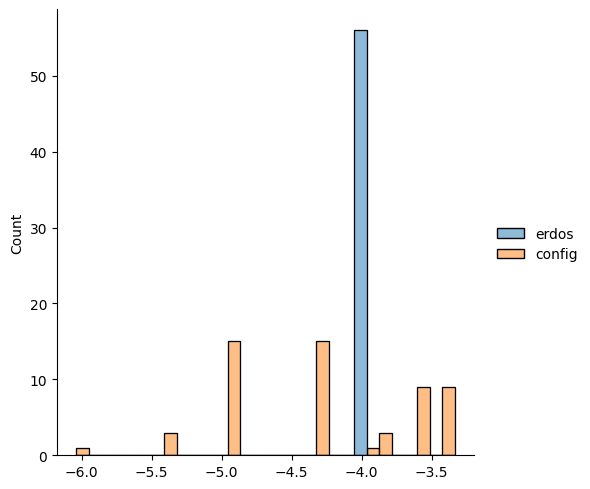

In [63]:
df = pd.DataFrame(logp)
sns.displot(logp)

In [97]:
evidence

[-24.819767107533494,
 -23.495383717194045,
 -23.495383717194045,
 -24.819767107533494,
 -13.495383717194049,
 -24.819767107533494,
 -31.319822054690796,
 -26.745411190772685,
 -23.495383717194045,
 -12.770402948699097,
 -23.495383717194045,
 -31.319822054690803,
 -23.495383717194045,
 -12.770402948699097,
 -23.495383717194045,
 -24.819767107533494,
 -13.495383717194049,
 -24.819767107533494,
 -11.319822054690794,
 -13.495383717194049,
 -24.819767107533494,
 -41.00633719908941,
 -35.50088793172035,
 -31.319822054690796,
 -19.87424490943599,
 -31.319822054690796,
 -35.50088793172035,
 -26.745411190772685,
 -16.61983304412225,
 -26.745411190772685,
 -23.495383717194045,
 -12.770402948699097,
 -23.495383717194045,
 -9.874244909436001,
 -12.770402948699097,
 -23.495383717194045,
 -41.006337199089415,
 -31.319822054690803,
 -19.874244909435994,
 -31.319822054690803,
 -23.495383717194045,
 -12.770402948699097,
 -23.495383717194045,
 -9.874244909436001,
 -12.770402948699097,
 -23.495383717194